In [1]:
%load_ext autoreload
%autoreload 2

# Support Vector Machine (SVM)

## Iris Dataset

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()

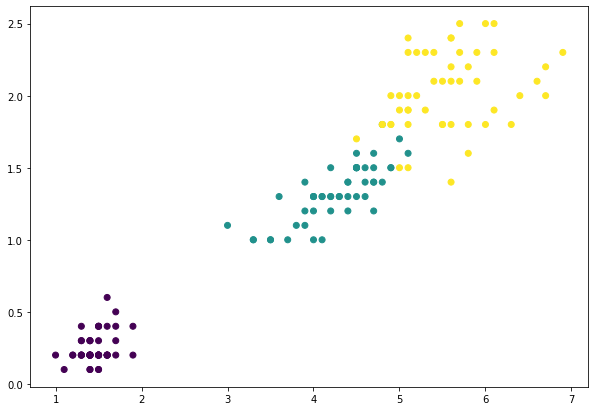

In [3]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X_iris = iris.data[:, [2, 3]]
y_iris = iris.target

plt.figure(figsize=(10, 7))


plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.show()

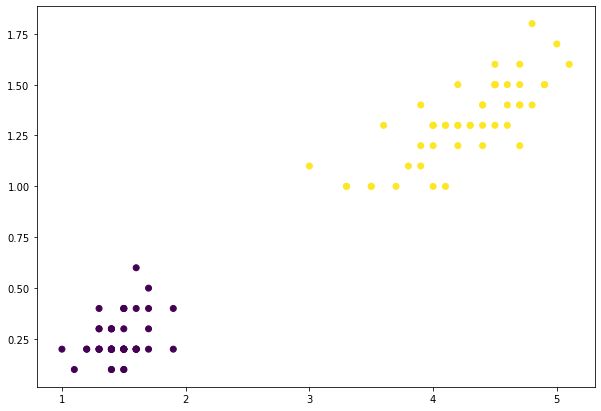

In [4]:
X = X_iris[y_iris != 2]
y = y_iris[y_iris != 2]


import matplotlib.pyplot as plt

plt.figure(figsize=(10 ,7))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear', probability=True))
])

In [7]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(kernel='linear', probability=True))])

In [8]:
model['model'].coef_

array([[1.02948044, 0.92995368]])

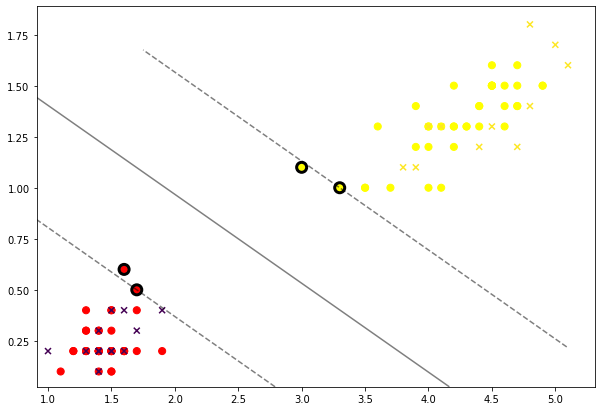

In [9]:
x = X_train
y = y_train
x_test = X_test
estimator = model['model']
scaler = model['scaler']

fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

lin_x = np.linspace(xlim[0], xlim[1], 30)
lin_y = np.linspace(ylim[0], ylim[1], 30)

grid_Y, grid_X = np.meshgrid(lin_y, lin_x)

xy = np.vstack([grid_X.ravel(), grid_Y.ravel()]).T

xy = scaler.transform(xy)

Z = estimator.decision_function(xy).reshape(grid_X.shape)

ax.contour(grid_X, grid_Y, Z,
           colors='k',
           levels=[-1, 0, 1],
           alpha=0.5,
           linestyles=['--', '-', '--']
           )

support_vectors = estimator.support_vectors_

support_vectors = scaler.inverse_transform(support_vectors)

ax.scatter(support_vectors[:, 0], support_vectors[:, 1],
           s=100, linewidth=3, facecolors='none', edgecolors='k')

ax.scatter(x_test[:, 0], x_test[:, 1], marker='x', c=y_test)

plt.show()

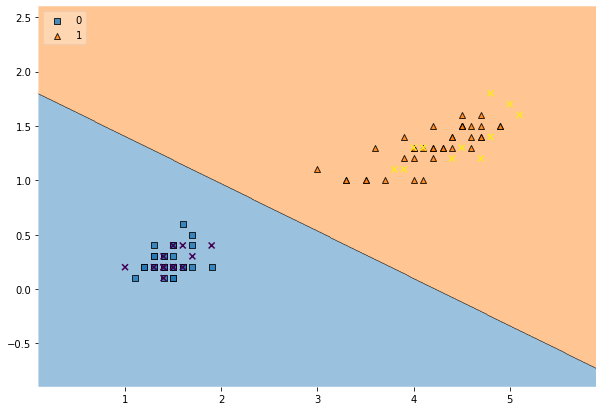

In [10]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 7))
plot_decision_regions(X_train, y_train, clf=model, legend=2)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test)
plt.show()

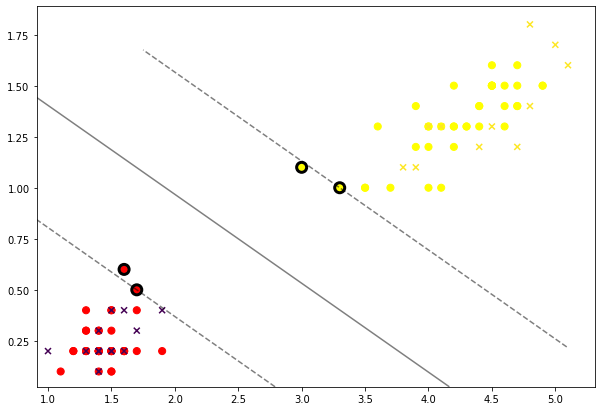

In [11]:
from plot_utils import plot_margins
plot_margins(x=X_train, 
             y=y_train, 
            estimator=model['model'],
            x_test=X_test,
            y_test=y_test,
            scaler=model['scaler'])

### Decision function

The desion function tells us on which side of the hyperplane generated by the classifier we are (and how far we are away from it). Based on that information, the estimator then label the examples with the corresponding label.

> Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict. Read more in the [User Guide](https://scikit-learn.org/stable/modules/svm.html#scores-probabilities).

In [13]:
model.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1])

In [14]:
model.decision_function(X_test)

array([ 3.31266131,  2.01076626,  3.42850868, -1.5525405 , -1.02153256,
       -1.64685528, -2.01076625,  1.53100793, -1.64685528, -1.71963748,
       -1.33419392, -1.57407309,  2.35314464, -1.71963748,  2.13479806,
       -1.71963748,  2.76012078,  3.40697609, -1.88673445, -1.31266133,
        2.37467723,  2.08354846, -1.23987914, -1.79241967,  1.60379012])

In [15]:
model.predict_proba(X_test)

array([[7.10001601e-06, 9.99992900e-01],
       [2.12338793e-02, 9.78766121e-01],
       [4.43100510e-06, 9.99995569e-01],
       [9.67310331e-01, 3.26896694e-02],
       [9.11804261e-01, 8.81957386e-02],
       [9.72973366e-01, 2.70266337e-02],
       [9.87071240e-01, 1.29287601e-02],
       [5.43674399e-02, 9.45632560e-01],
       [9.72973366e-01, 2.70266337e-02],
       [9.76671287e-01, 2.33287130e-02],
       [9.49377858e-01, 5.06221417e-02],
       [9.68698112e-01, 3.13018880e-02],
       [1.07007463e-02, 9.89299254e-01],
       [9.76671287e-01, 2.33287130e-02],
       [1.65807177e-02, 9.83419282e-01],
       [9.76671287e-01, 2.33287130e-02],
       [4.70602071e-03, 9.95293979e-01],
       [4.83680051e-06, 9.99995163e-01],
       [9.83370937e-01, 1.66290627e-02],
       [9.47165122e-01, 5.28348779e-02],
       [1.02470814e-02, 9.89752919e-01],
       [1.83677128e-02, 9.81632287e-01],
       [9.38984489e-01, 6.10155114e-02],
       [9.79867551e-01, 2.01324488e-02],
       [4.725007

# SGD

In [16]:
from sklearn.linear_model import SGDClassifier


sgd_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SGDClassifier(loss='hinge'))
])

sgd_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SGDClassifier())])

In [17]:
sgd_model['model'].coef_

array([[11.59743849,  8.25316155]])

## Non linear example

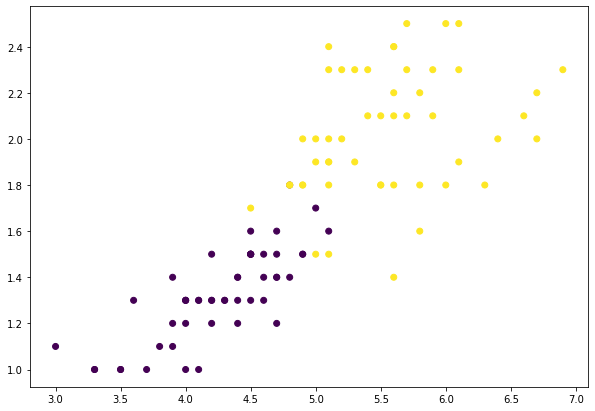

In [19]:
X = X_iris[y_iris != 0]
y = y_iris[y_iris != 0]


import matplotlib.pyplot as plt

plt.figure(figsize=(10 ,7))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear', probability=True))
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(kernel='linear', probability=True))])

In [22]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(kernel='linear', probability=True))])

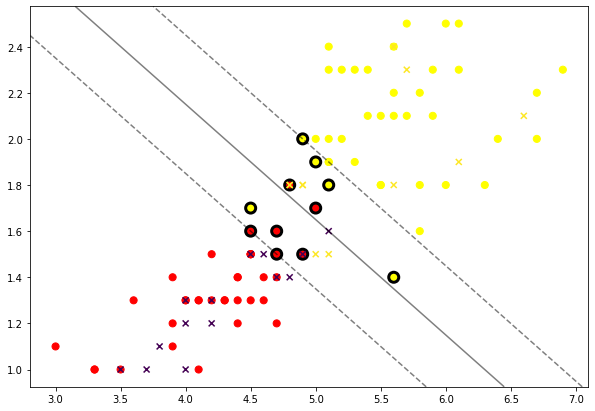

In [23]:
from plot_utils import plot_margins
plot_margins(x=X_train, 
             y=y_train, 
            estimator=model['model'],
            x_test=X_test,
            y_test=y_test,
            scaler=model['scaler'])

In [24]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='sigmoid', probability=True, C=0.3))
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.3, kernel='sigmoid', probability=True))])

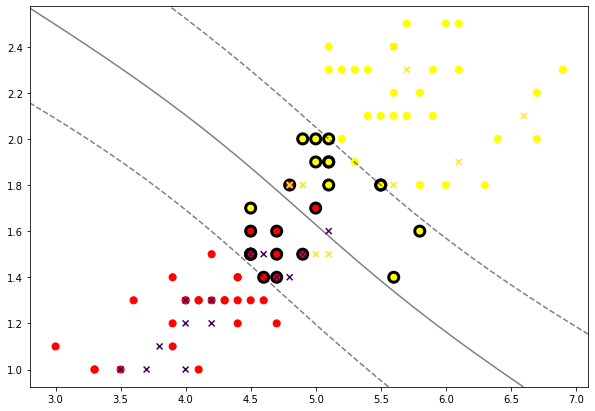

In [25]:
plot_margins(x=X_train, 
             y=y_train, 
            estimator=model['model'],
            x_test=X_test,
            y_test=y_test,
            scaler=model['scaler'])

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "model__C": np.arange(0.1, 3.1, 0.1),
        "model__kernel": ['poly', 'rbf', 'sigmoid']
    }
]

In [27]:
grid_search = GridSearchCV(model, param_grid, verbose=2, scoring='f1')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END ...................model__C=0.1, model__kernel=poly; total time=   0.0s
[CV] END ...................model__C=0.1, model__kernel=poly; total time=   0.0s
[CV] END ...................model__C=0.1, model__kernel=poly; total time=   0.0s
[CV] END ...................model__C=0.1, model__kernel=poly; total time=   0.0s
[CV] END ...................model__C=0.1, model__kernel=poly; total time=   0.0s
[CV] END ....................model__C=0.1, model__kernel=rbf; total time=   0.0s
[CV] END ....................model__C=0.1, model__kernel=rbf; total time=   0.0s
[CV] END ....................model__C=0.1, model__kernel=rbf; total time=   0.0s
[CV] END ....................model__C=0.1, model__kernel=rbf; total time=   0.0s
[CV] END ....................model__C=0.1, model__kernel=rbf; total time=   0.0s
[CV] END ................model__C=0.1, model__kernel=sigmoid; total time=   0.0s
[CV] END ................model__C=0.1, model__k

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        SVC(C=0.3, kernel='sigmoid',
                                            probability=True))]),
             param_grid=[{'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. ]),
                          'model__kernel': ['poly', 'rbf', 'sigmoid']}],
             scoring='f1', verbose=2)

In [28]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000639,0.000230,0.000374,1.285350e-04,0.1,poly,"{'model__C': 0.1, 'model__kernel': 'poly'}",0.857143,0.923077,1.000000,1.000000,1.000000,0.956044,0.057732,2
1,0.000842,0.000156,0.000458,8.812996e-05,0.1,rbf,"{'model__C': 0.1, 'model__kernel': 'rbf'}",1.000000,0.857143,1.000000,1.000000,0.923077,0.956044,0.057732,2
2,0.000802,0.000024,0.000489,6.079919e-05,0.1,sigmoid,"{'model__C': 0.1, 'model__kernel': 'sigmoid'}",1.000000,0.857143,1.000000,0.933333,0.923077,0.942711,0.053590,58
3,0.000600,0.000040,0.000405,2.534720e-05,0.2,poly,"{'model__C': 0.2, 'model__kernel': 'poly'}",0.857143,0.875000,1.000000,1.000000,1.000000,0.946429,0.065854,56
4,0.000641,0.000028,0.000377,1.520610e-05,0.2,rbf,"{'model__C': 0.2, 'model__kernel': 'rbf'}",1.000000,0.857143,1.000000,1.000000,0.923077,0.956044,0.057732,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.000336,0.000007,0.000246,9.097473e-07,2.9,rbf,"{'model__C': 2.9000000000000004, 'model__kerne...",1.000000,0.857143,1.000000,1.000000,0.923077,0.956044,0.057732,2
86,0.000317,0.000011,0.000243,2.352504e-06,2.9,sigmoid,"{'model__C': 2.9000000000000004, 'model__kerne...",1.000000,0.857143,1.000000,0.933333,0.923077,0.942711,0.053590,58
87,0.000328,0.000006,0.000242,7.599534e-07,3.0,poly,"{'model__C': 3.0000000000000004, 'model__kerne...",0.933333,0.923077,0.923077,0.923077,0.833333,0.907179,0.037136,81
88,0.000349,0.000032,0.000267,3.159873e-05,3.0,rbf,"{'model__C': 3.0000000000000004, 'model__kerne...",1.000000,0.857143,1.000000,1.000000,0.923077,0.956044,0.057732,2
